# Predicting 10-Year Risk of Heart Disease Using Clinical and Lifestyle Indicators

### Reading the data
* Import pandas
* read_csv()
* info()
    - Gives me general information on the data
    - Allows me to determine my independent and dependent variables
    - Allows me to check if there are any categorical columns that I may need to change or get rid of
    - Allows me to see if there are any columns with a lot of null values
* head()
    - Allows me to quickly visualize some of the data

In [1]:
import pandas as pd

df = pd.read_csv("framingham.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Cleaning the data
* nunique()
    - Allowed me to check to see if there were any columns with only one value which I could drop
* dropna()
    - Allowed me to drop rows with missing values to avoid misleading results or issues with my model

In [3]:
df.nunique()
df.dropna(inplace=True)

### Visualizing the data
* Import seaborn
* heatmap()
    - Allowed me to create a heatmap of the correlations between my independent variables and dependent variables

<Axes: >

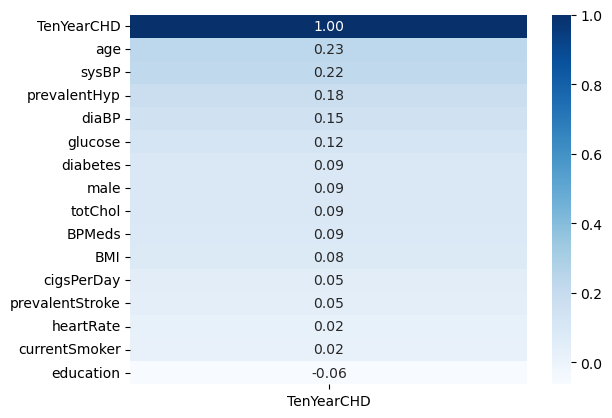

In [4]:
import seaborn as sns

sns.heatmap(data=df.corr()[['TenYearCHD']].sort_values(by='TenYearCHD', ascending=False), cmap="Blues", annot=True, fmt=f'.2f', vmin=df.corr().TenYearCHD.min(), vmax=1)

* Import matplotlib
* value_counts()
    - used to get the count of each unique value in TenYearCHD
* plot()
    - used to create the bar graph

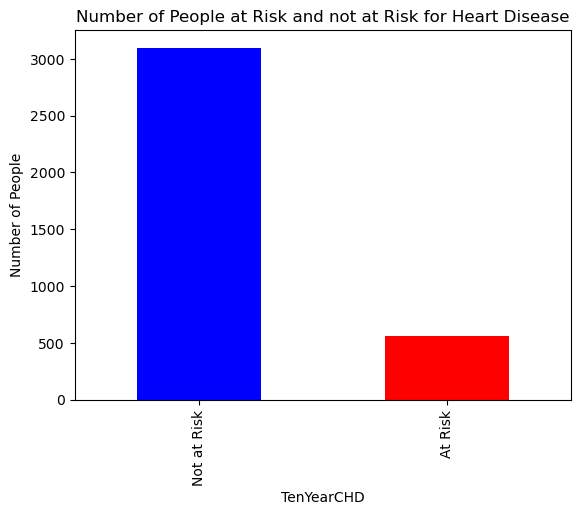

In [5]:
import matplotlib.pyplot as plt

new_df = pd.DataFrame({"TenYearCHD":["Not at Risk", "At Risk"], 
                       "Totals":[((df["TenYearCHD"].value_counts())[0]), ((df["TenYearCHD"].value_counts())[1])]})
new_df.plot(kind="bar", x="TenYearCHD", y="Totals", legend=False, color=["blue", "red"], title="Number of People at Risk and not at Risk for Heart Disease", ylabel="Number of People")
plt.show()

### Creating my Regression Model
* Import sklearn
* train_test_split()
    - used to split the testing and training data
* LogisticalRegression
    - I used a logistical regression model because my dependent variable is binary
* fit()
    - used to fit the training data
* predict()
    - used to predict data from our testing data and fitted training data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\zacwr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* max_iter=5000
    - used to avoid warning

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Analyzing my Model
* coef_
    - used to determine the coefficient for each independent variable when compared to the dependent variable
    - a positive coefficient means that the variable increased the likelyhood of 10 year heart disease
    - a negative coefficient means that the variable decreases the likelyhood of 10 year heart disease
    - closer to 1 or -1 means a stronger coefficient

In [8]:
coeff_df = pd.DataFrame({
    'ColumnName': X.columns,
    'Coefficient': model.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

         ColumnName  Coefficient
0              male     0.486134
5            BPMeds     0.462379
6   prevalentStroke     0.368472
7      prevalentHyp     0.167754
1               age     0.058133
3     currentSmoker     0.034693
4        cigsPerDay     0.017115
10            sysBP     0.015275
14          glucose     0.006893
9           totChol     0.002875
12              BMI    -0.000556
11            diaBP    -0.003145
13        heartRate    -0.005282
2         education    -0.032464
8          diabetes    -0.116064


* Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

print(f"There were {confusion_matrix(y_test, y_pred)[0][0]} people that were predicted to be not at risk and they were truly not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[0][1]} people that were predicted to be at risk but they were actually not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][0]} people that were predicted to be not at risk but they were actually at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][1]} people that were predicted to be at risk and they were truly at risk")

There were 1221 people that were predicted to be not at risk and they were truly not at risk
There were 9 people that were predicted to be at risk but they were actually not at risk
There were 217 people that were predicted to be not at risk but they were actually at risk
There were 16 people that were predicted to be at risk and they were truly at risk


* Classification Report
    - Percision: Of all predicted positives, how many were actually positive? (TP / (TP + FP))
    - Recall: Of all actual positives, how many did we correctly predict? (TP / (TP + FN))
    - F1-Score: Harmonic mean of precision and recall (balances the two)
    - Support: Number of actual instances of each class in the test set

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1230
           1       0.64      0.07      0.12       233

    accuracy                           0.85      1463
   macro avg       0.74      0.53      0.52      1463
weighted avg       0.82      0.85      0.79      1463



### Visualizing my Model
* histplot()
    - allowed me to create a histogram of the predicted probablilites for at risk people
    - This shows that there is a low probability that there will be a large amount of people at risk and a high probability of a small amount of people being at risk

Text(0.5, 0, 'Probability')

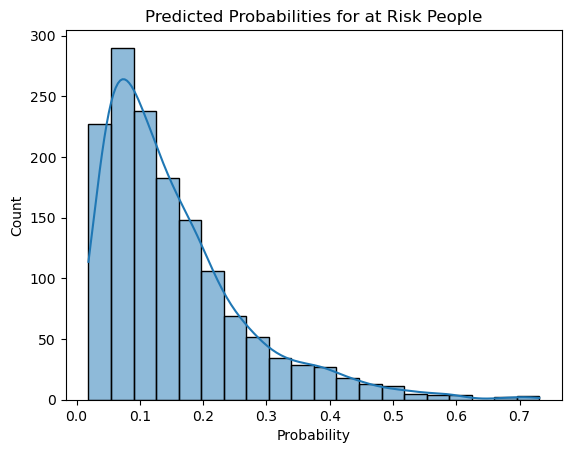

In [11]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Probabilities for at Risk People')
plt.xlabel('Probability')

* roc_curve
    - another way for me to visualize how well my model predicted people at risk
    - a good model has a curve that hugs the top left corner as much as possible
    - AUC is the area under the curve
    - shows that the model is okay

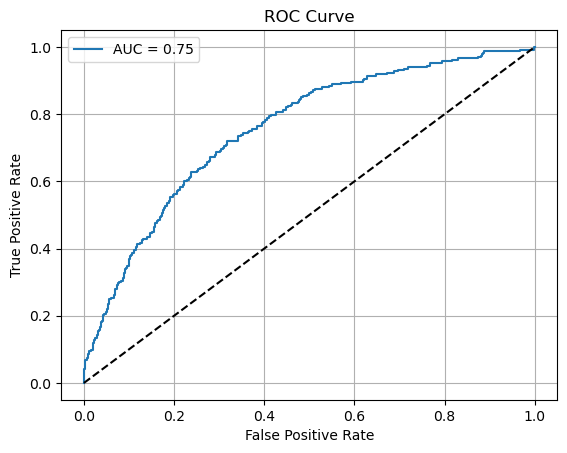

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Trying the Improve my Model
* class_weight='balanced'
    - good for balancing the data when dependent variable is rare
    - This did not work

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LogisticRegression(max_iter=5000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
coeff_df = pd.DataFrame({
    'ColumnName': X.columns,
    'Coefficient': model.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

         ColumnName  Coefficient
6   prevalentStroke     0.829587
0              male     0.550100
5            BPMeds     0.279013
8          diabetes     0.249877
7      prevalentHyp     0.150203
3     currentSmoker     0.083879
1               age     0.062150
12              BMI     0.017581
4        cigsPerDay     0.014340
10            sysBP     0.014188
14          glucose     0.004184
9           totChol     0.003111
13        heartRate     0.000230
11            diaBP    -0.003347
2         education    -0.078417


In [15]:
print(f"There were {confusion_matrix(y_test, y_pred)[0][0]} people that were predicted to be not at risk and they were truly not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[0][1]} people that were predicted to be at risk but they were actually not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][0]} people that were predicted to be not at risk but they were actually at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][1]} people that were predicted to be at risk and they were truly at risk")

There were 532 people that were predicted to be not at risk and they were truly not at risk
There were 248 people that were predicted to be at risk but they were actually not at risk
There were 39 people that were predicted to be not at risk but they were actually at risk
There were 95 people that were predicted to be at risk and they were truly at risk


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       780
           1       0.28      0.71      0.40       134

    accuracy                           0.69       914
   macro avg       0.60      0.70      0.59       914
weighted avg       0.84      0.69      0.73       914



Text(0.5, 0, 'Probability')

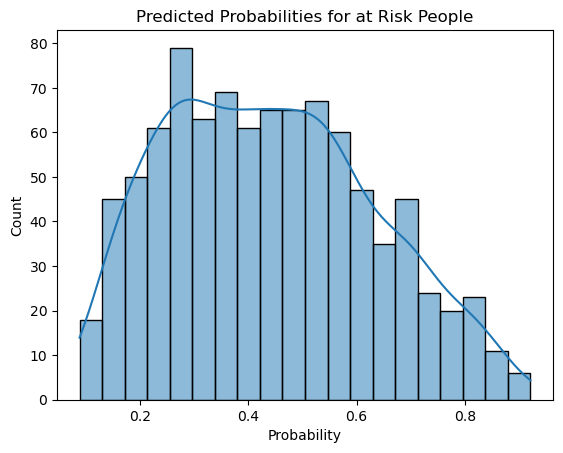

In [17]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Probabilities for at Risk People')
plt.xlabel('Probability')

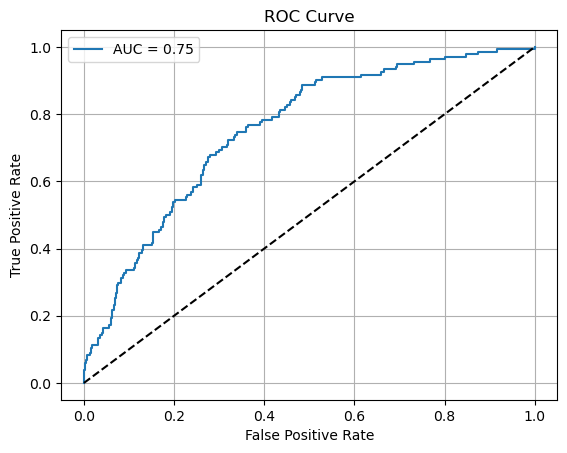

In [18]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

* StandardScaler
    - used to scale the data
    - transforms the independent variable to have mean = 0 and standard deviation = 1
    - speeds up convergence of optimization of in logistic regression
    - improves interpretability of coefficients
    - make regularization more effective

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
coeff_df = pd.DataFrame({
    'ColumnName': X.columns,
    'Coefficient': model.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

         ColumnName  Coefficient
1               age     0.504848
10            sysBP     0.345676
0              male     0.290179
4        cigsPerDay     0.177828
14          glucose     0.146976
9           totChol     0.145527
6   prevalentStroke     0.081619
7      prevalentHyp     0.068996
12              BMI     0.048213
5            BPMeds     0.029637
3     currentSmoker     0.025727
8          diabetes     0.022403
13        heartRate     0.002334
11            diaBP    -0.051093
2         education    -0.058125


In [21]:
print(f"There were {confusion_matrix(y_test, y_pred)[0][0]} people that were predicted to be not at risk and they were truly not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[0][1]} people that were predicted to be at risk but they were actually not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][0]} people that were predicted to be not at risk but they were actually at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][1]} people that were predicted to be at risk and they were truly at risk")

There were 772 people that were predicted to be not at risk and they were truly not at risk
There were 8 people that were predicted to be at risk but they were actually not at risk
There were 125 people that were predicted to be not at risk but they were actually at risk
There were 9 people that were predicted to be at risk and they were truly at risk


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       780
           1       0.53      0.07      0.12       134

    accuracy                           0.85       914
   macro avg       0.70      0.53      0.52       914
weighted avg       0.81      0.85      0.80       914



Text(0.5, 0, 'Probability')

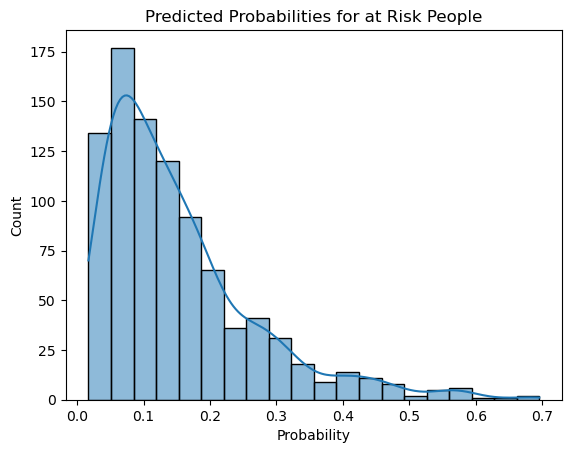

In [23]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Probabilities for at Risk People')
plt.xlabel('Probability')

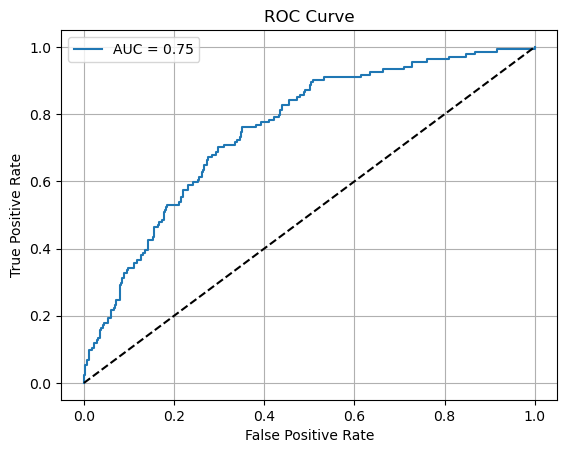

In [24]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

* PolynomialFeatures
    - introduces interaction terms and higher-degree combinations of the variables
    - allows the model to capture nonlinear relationships in the data

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
print(f"There were {confusion_matrix(y_test, y_pred)[0][0]} people that were predicted to be not at risk and they were truly not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[0][1]} people that were predicted to be at risk but they were actually not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][0]} people that were predicted to be not at risk but they were actually at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][1]} people that were predicted to be at risk and they were truly at risk")

There were 759 people that were predicted to be not at risk and they were truly not at risk
There were 21 people that were predicted to be at risk but they were actually not at risk
There were 119 people that were predicted to be not at risk but they were actually at risk
There were 15 people that were predicted to be at risk and they were truly at risk


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       780
           1       0.42      0.11      0.18       134

    accuracy                           0.85       914
   macro avg       0.64      0.54      0.55       914
weighted avg       0.80      0.85      0.81       914



Text(0.5, 0, 'Probability')

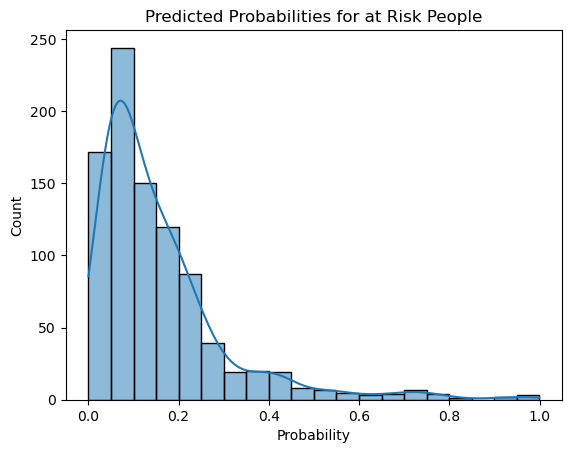

In [28]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Probabilities for at Risk People')
plt.xlabel('Probability')

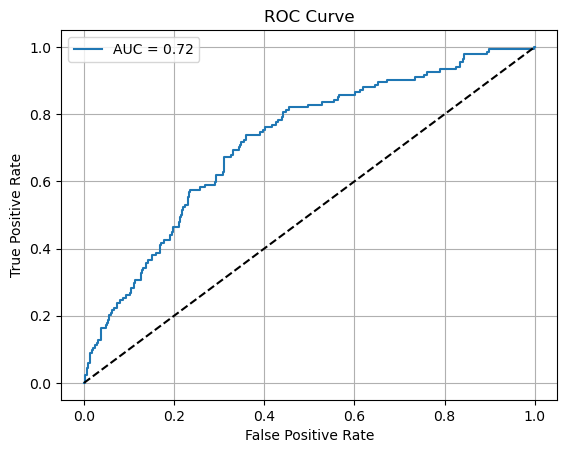

In [29]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

* SimpleImputer
    - fills in missing values with the median value of the variable
    - should be better that dropping the missing values

In [30]:
#fill in missing values with the median value instead of dropping them
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
coeff_df = pd.DataFrame({
    'ColumnName': X.columns,
    'Coefficient': model.coef_[0]})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

         ColumnName  Coefficient
6   prevalentStroke     0.825960
0              male     0.578102
5            BPMeds     0.163284
7      prevalentHyp     0.147617
8          diabetes     0.121256
1               age     0.059345
3     currentSmoker     0.048783
10            sysBP     0.015705
4        cigsPerDay     0.015063
12              BMI     0.012421
14          glucose     0.006236
9           totChol     0.003315
13        heartRate     0.000182
11            diaBP    -0.004243
2         education    -0.056527


In [32]:
print(f"There were {confusion_matrix(y_test, y_pred)[0][0]} people that were predicted to be not at risk and they were truly not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[0][1]} people that were predicted to be at risk but they were actually not at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][0]} people that were predicted to be not at risk but they were actually at risk")
print(f"There were {confusion_matrix(y_test, y_pred)[1][1]} people that were predicted to be at risk and they were truly at risk")

There were 774 people that were predicted to be not at risk and they were truly not at risk
There were 6 people that were predicted to be at risk but they were actually not at risk
There were 125 people that were predicted to be not at risk but they were actually at risk
There were 9 people that were predicted to be at risk and they were truly at risk


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       780
           1       0.60      0.07      0.12       134

    accuracy                           0.86       914
   macro avg       0.73      0.53      0.52       914
weighted avg       0.82      0.86      0.80       914



Text(0.5, 0, 'Probability')

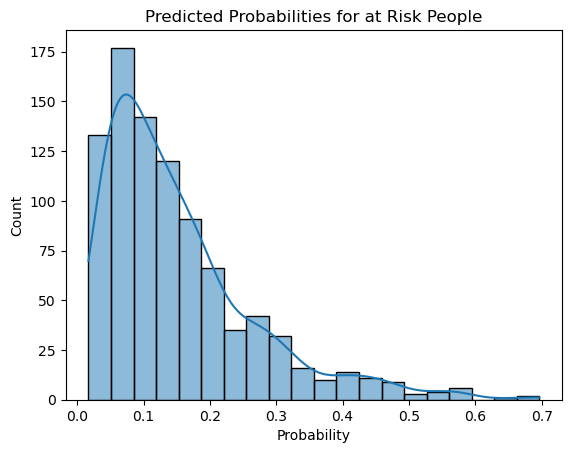

In [34]:
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, bins=20, kde=True)
plt.title('Predicted Probabilities for at Risk People')
plt.xlabel('Probability')

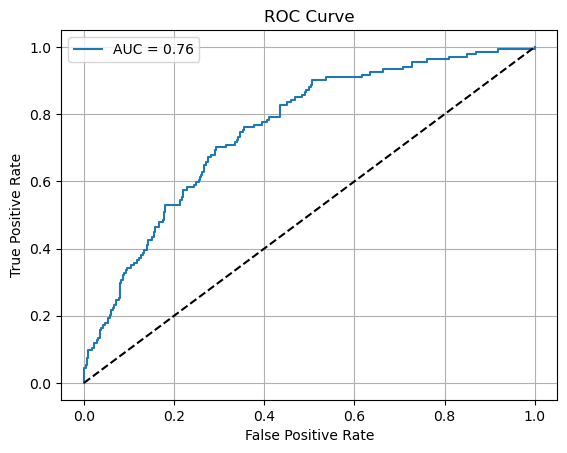

In [35]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
* It was difficult to find a good model to predict people that are at risk
    - Percision was less than or equal to 0.64
* It was easier to predict that people were not at risk
    - Percision got up to 0.93
* Limitations
    - amount of data
    - binary dependent variable
    - small amount of at risk people
    - regression model
* Improvements
    - trying different models
    - getting more data
    - could have tried to cleaned the data more